In [3]:
import pandas as pd # Pandas (version : 1.1.5)
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version : 3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)



In [5]:
data=pd.read_csv("C:/Users/sanke/Downloads/Iris dataset/Iris.csv")

In [7]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
len(data)

150

In [17]:
data.shape

(150, 6)

In [19]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [29]:
data.dtypes


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [39]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
data['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [45]:
# target data
target_data = data.iloc[:,4]
target_data.head()

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: PetalWidthCm, dtype: float64

In [47]:
# Training data
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


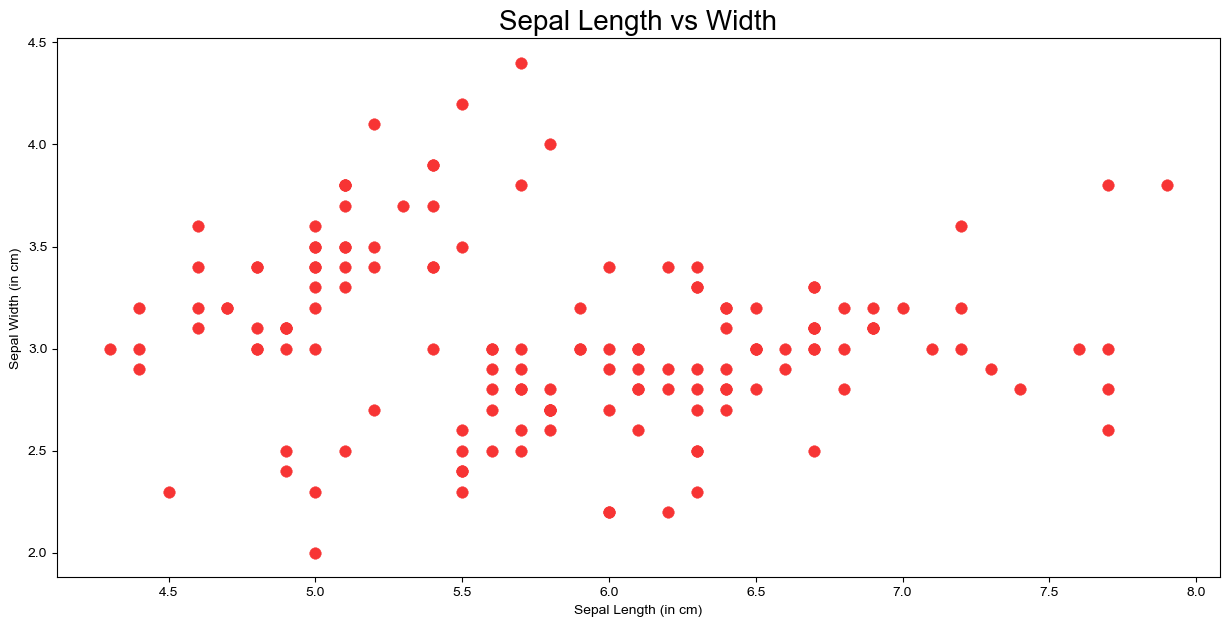

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'], s=70, color='#f73434',
                     edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()


In [51]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\sanke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

array([281831.54466667,  70614.68447724,  31361.41095366,  17852.15244298,
        11581.57439773,   8050.83616918,   6154.86703693,   4612.9562165 ,
         3674.86935539,   3019.13510081])

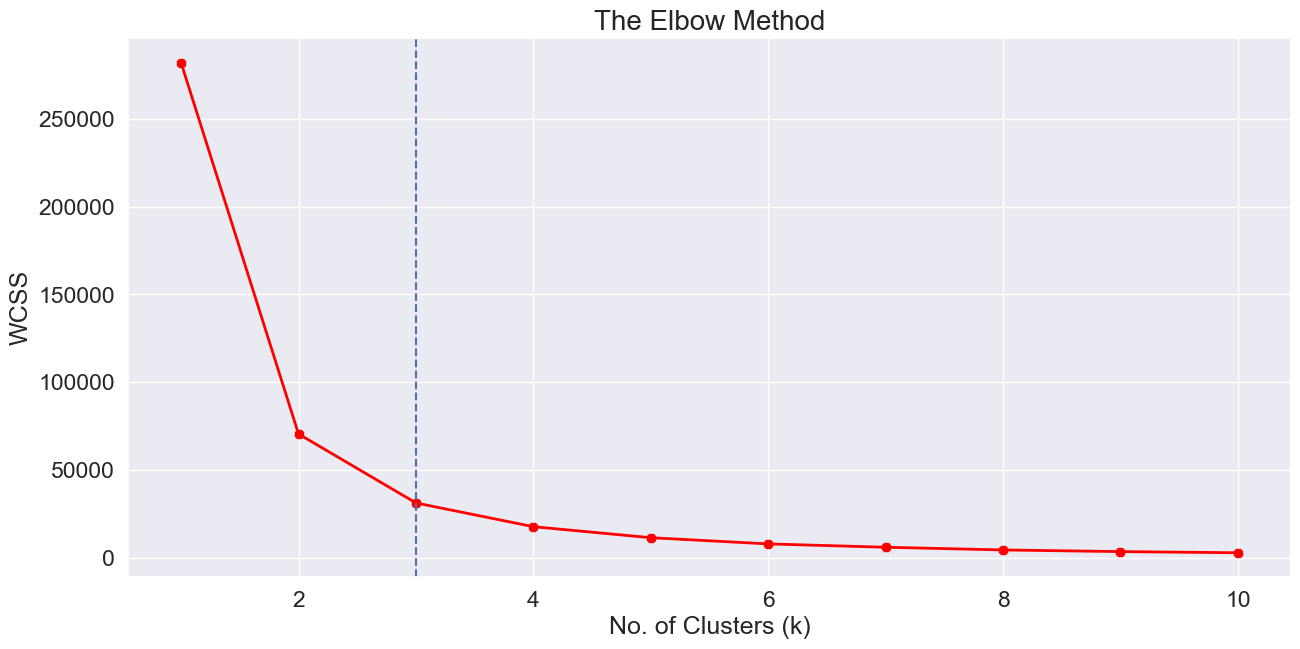

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [55]:
## Clustering

In [57]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)
KMeans(n_clusters=3)

C:\Users\sanke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [59]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

C:\Users\sanke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Cluster_Prediction
0,1,5.1,3.5,1.4,1
1,2,4.9,3.0,1.4,1
2,3,4.7,3.2,1.3,1
3,4,4.6,3.1,1.5,1
4,5,5.0,3.6,1.4,1


In [61]:
kms.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

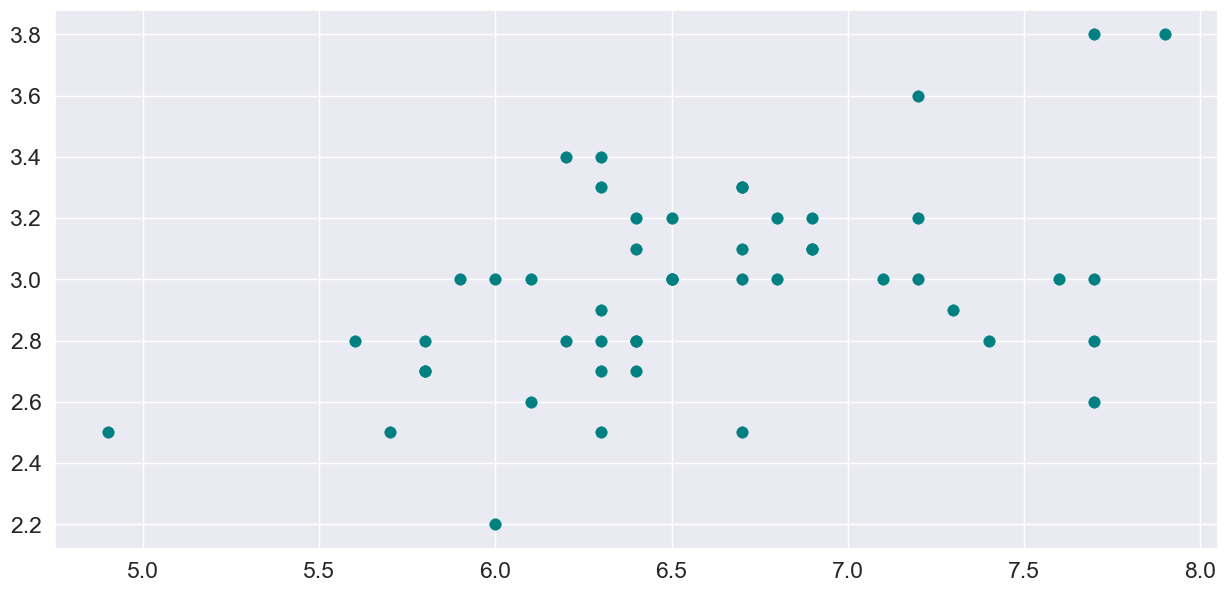

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')

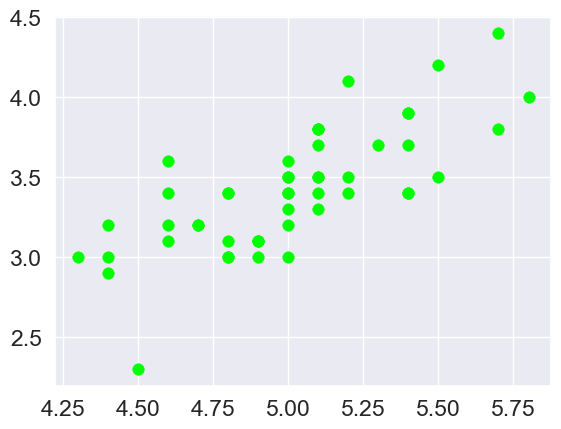

In [65]:
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


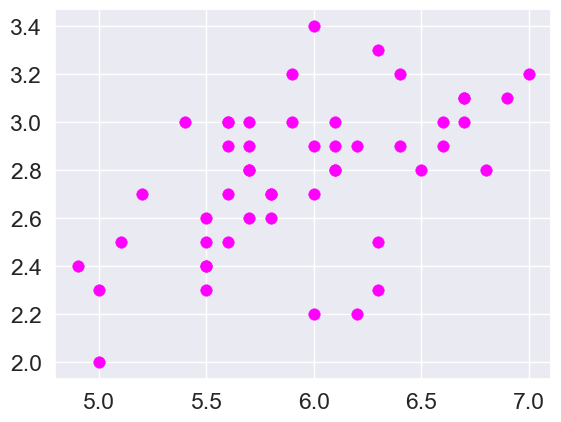

In [67]:
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')


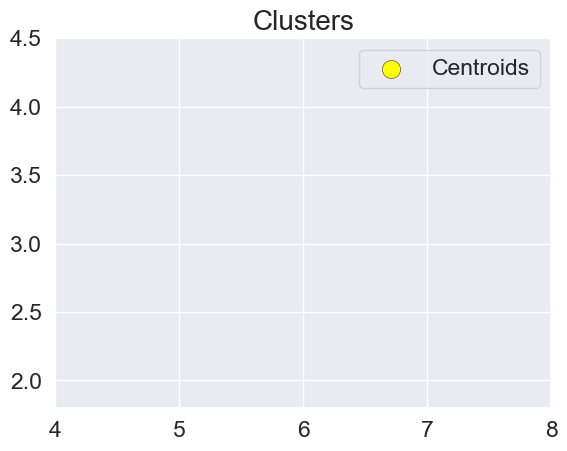

In [73]:
plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label =
'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

In [81]:
import matplotlib.pyplot as plt

plt.scatter(x=kms.cluster_centers_[:,'Id']
            y=kms.cluster_centers_[:,'SepalLengthCm'] 
            s=170, 
            c='yellow', 
            label='Centroids',
            edgecolor='black', 
            linewidth=0.3)

plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.title('Clusters', fontsize=20)
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3724526898.py, line 3)